## Which is the most powerful Gen 1 Pokemon?
(Simple - average scaled stats studied)

* Trying out **sqlite package** to explore database (from : https://www.dropbox.com/s/dhcz0ryqoxeqqrf/pokedex.sqlite?dl=0 )
   
   - Database contains 170 tables with information on 6 Generations of Pokemons. 
   
   - Moves, Types and several play statistics are listed, for multiple language ids. 

    
* Using **pandas and matplotlib** to analyze a .csv Pokemon dataset (from :https://www.dropbox.com/s/ms0tixxeflq1toc/Pokemon.csv?dl=0 )
    
    - Data Cleaning 
     
    - Trying out **seaborn package** for data visualization
       
       - Distribution across generations. 
       
       - Distribution of primary and secondary 'types' of Pokemon. 
    
    - Trying out the **numpy package**
       
       - Unique types, most common types of Pokemon. 
       
       - Correlation of attack, defence, hp etc statistics. 
      
      - Exploring the need to scale data. Identifying the most poweful Pokemon. 
      
      - Do and types of Pokemon excel at certain statistics?

In [2]:
import sqlite3
con = sqlite3.connect("./pokedex.sqlite")
cur=con.cursor()

In [6]:
# Use this command below to see the list of tables in the DB
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
A = cur.fetchall()
len(A)

170

### Types :

In [3]:
# Checking information in table 'pokemon_types'
cur.execute("PRAGMA table_info('pokemon_types')")
for line in cur.fetchall():
    print(line)

(0, 'pokemon_id', 'INTEGER', 1, None, 1)
(1, 'type_id', 'INTEGER', 1, None, 0)
(2, 'slot', 'INTEGER', 1, None, 2)


In [4]:
# Checking information in table type_names'
cur.execute("PRAGMA table_info('type_names')")
for line in cur.fetchall():
    print(line)

(0, 'type_id', 'INTEGER', 1, None, 1)
(1, 'local_language_id', 'INTEGER', 1, None, 2)
(2, 'name', 'VARCHAR(12)', 1, None, 0)


In [5]:
# Write a query to output the type_id, name for different type of Pokemon and only when the language is English.
cur.execute('SELECT DISTINCT type_id, name FROM type_names WHERE local_language_id = 9')
cur.fetchall()

[(1, 'Normal'),
 (2, 'Fighting'),
 (3, 'Flying'),
 (4, 'Poison'),
 (5, 'Ground'),
 (6, 'Rock'),
 (7, 'Bug'),
 (8, 'Ghost'),
 (9, 'Steel'),
 (10, 'Fire'),
 (11, 'Water'),
 (12, 'Grass'),
 (13, 'Electric'),
 (14, 'Psychic'),
 (15, 'Ice'),
 (16, 'Dragon'),
 (17, 'Dark'),
 (10001, '???'),
 (10002, 'Shadow')]

### Gen 1 moves :

In [6]:
#Checking information in table 'move_names'
cur.execute("PRAGMA table_info('move_names')")
for line in cur.fetchall():
    print(line)

(0, 'move_id', 'INTEGER', 1, None, 1)
(1, 'local_language_id', 'INTEGER', 1, None, 2)
(2, 'name', 'VARCHAR(24)', 1, None, 0)


In [7]:
#Checking information in table 'moves'
cur.execute("PRAGMA table_info('moves')")
for line in cur.fetchall():
    print(line)

(0, 'id', 'INTEGER', 1, None, 1)
(1, 'identifier', 'VARCHAR(24)', 1, None, 0)
(2, 'generation_id', 'INTEGER', 1, None, 0)
(3, 'type_id', 'INTEGER', 1, None, 0)
(4, 'power', 'SMALLINT', 1, None, 0)
(5, 'pp', 'SMALLINT', 0, None, 0)
(6, 'accuracy', 'SMALLINT', 0, None, 0)
(7, 'priority', 'SMALLINT', 1, None, 0)
(8, 'target_id', 'INTEGER', 1, None, 0)
(9, 'damage_class_id', 'INTEGER', 1, None, 0)
(10, 'effect_id', 'INTEGER', 1, None, 0)
(11, 'effect_chance', 'INTEGER', 0, None, 0)
(12, 'contest_type_id', 'INTEGER', 0, None, 0)
(13, 'contest_effect_id', 'INTEGER', 0, None, 0)
(14, 'super_contest_effect_id', 'INTEGER', 0, None, 0)


In [8]:
# Write a query to output the name of the move and name of the type for Generation 1 Pokemon. 
#You wanna look into move_names,moves and type_names tables
query='''SELECT identifier, name FROM type_names LEFT JOIN moves ON type_names.type_id=moves.type_id 
WHERE generation_id=1 AND local_language_id = 9'''
cur.execute(query)
cur.fetchall()

[('pound', 'Normal'),
 ('karate-chop', 'Fighting'),
 ('doubleslap', 'Normal'),
 ('comet-punch', 'Normal'),
 ('mega-punch', 'Normal'),
 ('pay-day', 'Normal'),
 ('fire-punch', 'Fire'),
 ('ice-punch', 'Ice'),
 ('thunderpunch', 'Electric'),
 ('scratch', 'Normal'),
 ('vicegrip', 'Normal'),
 ('guillotine', 'Normal'),
 ('razor-wind', 'Normal'),
 ('swords-dance', 'Normal'),
 ('cut', 'Normal'),
 ('gust', 'Flying'),
 ('wing-attack', 'Flying'),
 ('whirlwind', 'Normal'),
 ('fly', 'Flying'),
 ('bind', 'Normal'),
 ('slam', 'Normal'),
 ('vine-whip', 'Grass'),
 ('stomp', 'Normal'),
 ('double-kick', 'Fighting'),
 ('mega-kick', 'Normal'),
 ('jump-kick', 'Fighting'),
 ('rolling-kick', 'Fighting'),
 ('sand-attack', 'Ground'),
 ('headbutt', 'Normal'),
 ('horn-attack', 'Normal'),
 ('fury-attack', 'Normal'),
 ('horn-drill', 'Normal'),
 ('tackle', 'Normal'),
 ('body-slam', 'Normal'),
 ('wrap', 'Normal'),
 ('take-down', 'Normal'),
 ('thrash', 'Normal'),
 ('double-edge', 'Normal'),
 ('tail-whip', 'Normal'),
 ('

### It is hard to write custome queries each time. Lets use the power of Pandas/Python by getting everything into Pandas DF:

In [9]:
import pandas as pd

# Use "for loops" to read each table in the DB and store it as a df with the same name as the table.
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
for value in cur.fetchall():
    query='SELECT * FROM {}'.format(value[0])
    name=str(value[0])+'_df'
    globals()[name]=pd.read_sql_query(query, con)
    print(name)

conquest_move_displacements_df
encounter_methods_df
move_targets_df
berry_firmness_df
pokemon_move_methods_df
conquest_warrior_stats_df
item_flags_df
item_fling_effects_df
item_pockets_df
move_damage_classes_df
evolution_triggers_df
contest_effects_df
pokemon_habitats_df
genders_df
super_contest_effects_df
conquest_move_ranges_df
move_meta_categories_df
egg_groups_df
conquest_episodes_df
contest_types_df
move_flags_df
conquest_warrior_archetypes_df
conquest_stats_df
encounter_conditions_df
pokemon_colors_df
move_battle_styles_df
pal_park_areas_df
move_effects_df
regions_df
conquest_move_effects_df
growth_rates_df
languages_df
pokeathlon_stats_df
conquest_warrior_skills_df
pokemon_shapes_df
move_meta_ailments_df
stats_df
conquest_warrior_skill_names_df
conquest_move_displacement_prose_df
pokemon_color_names_df
encounter_condition_prose_df
item_fling_effect_prose_df
pokedexes_df
evolution_trigger_prose_df
experience_df
berry_firmness_names_df
move_meta_ailment_names_df
move_effect_prose_

## back to Pandas, some data exploration :

Download another Pokemon dataset from here :https://www.dropbox.com/s/ms0tixxeflq1toc/Pokemon.csv?dl=0 
Lets explore:

In [10]:
import pandas as pd
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [11]:
#Let's rename the # column to id, and convert all column labels to lower case.
df.rename(columns={'#':'id'},  inplace=True)
df.rename(str.lower,  axis='columns', inplace=True)
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [12]:
#Now let's take a look at any duplicated rows via the id column.
df[df.duplicated('id', keep=False)]

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
18,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False


In [13]:
# Lets exclude these duplicates in our analysis except for the first instance.
df.drop_duplicates('id',inplace=True)
df[df.duplicated('id', keep=False)]

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary


In [14]:
import numpy as np
df['type 2']

0      Poison
1      Poison
2      Poison
4         NaN
5         NaN
6      Flying
9         NaN
10        NaN
11        NaN
13        NaN
14        NaN
15     Flying
16     Poison
17     Poison
18     Poison
20     Flying
21     Flying
22     Flying
24        NaN
25        NaN
26     Flying
27     Flying
28        NaN
29        NaN
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
        ...  
762       NaN
763       NaN
764    Normal
765    Normal
766    Dragon
767    Dragon
768       Ice
769       Ice
770       NaN
771    Flying
772     Fairy
773     Fairy
774       NaN
775       NaN
776       NaN
777     Fairy
778     Grass
779     Grass
780     Grass
784     Grass
788       NaN
789       NaN
790    Dragon
791    Dragon
792       NaN
793    Flying
794    Ground
795     Fairy
797     Ghost
799     Water
Name: type 2, Length: 721, dtype: object

In [15]:
# Fill the Nan values
df.fillna('blank', inplace=True)
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,blank,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,blank,405,58,64,58,80,65,80,1,False


In [16]:
#The dataset contains both information regarding the identity and statistics of each Pokemon species; therefore, 
#let's separate these two observational units into separate tables: pokedex and statistics.
pokedex=pd.DataFrame(df, columns=['id', 'name', 'type 1', 'type 2', 'generation', 'legendary'])
pokedex.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,blank,1,False
5,5,Charmeleon,Fire,blank,1,False


In [17]:
# create poke_statistics with these columns:['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']
poke_statistics=pd.DataFrame(df, columns=['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total'])

In [18]:
poke_statistics.describe()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,68.380028,75.124827,70.697642,68.848821,69.180305,65.714286,417.945908
std,208.27906,25.848272,29.070335,29.194941,28.898590,26.899364,27.277920,109.663671
min,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.000000
25%,181.00000,50.000000,54.000000,50.000000,45.000000,50.000000,45.000000,320.000000
50%,361.00000,65.000000,75.000000,65.000000,65.000000,65.000000,65.000000,424.000000
75%,541.00000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,499.000000
max,721.00000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,720.000000


### Now we have a clean dataset. 
### Lets see : How are Pokemon numbers distributed across generations?

In [19]:
# create a groupby to see below :
pokedex.groupby('generation').describe()['id']

,count,mean,std,min,25%,50%,75%,max
generation,,,,,,,,
1,151.0,76.0,43.734045,1.0,38.50,76.0,113.50,151.0
2,100.0,201.5,29.011492,152.0,176.75,201.5,226.25,251.0
3,135.0,319.0,39.115214,252.0,285.50,319.0,352.50,386.0
4,107.0,440.0,31.032241,387.0,413.50,440.0,466.50,493.0
5,156.0,571.5,45.177428,494.0,532.75,571.5,610.25,649.0
6,72.0,685.5,20.928450,650.0,667.75,685.5,703.25,721.0


Text(0, 0.5, '# of Pokemon')

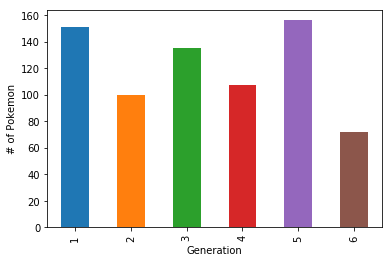

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
pokedex.groupby('generation').count()['id'].plot(kind='bar')
plt.xlabel('Generation')
plt.ylabel('# of Pokemon')

### Try Seaboarn:

In [21]:
import seaborn as sb

C:\Users\orpit\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


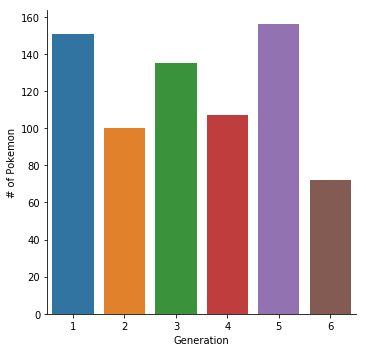

In [22]:
sb.factorplot(kind='count', data=pokedex, x='generation').set_axis_labels("Generation", "# of Pokemon")

#### There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.

#### Let's dig a bit deeper and examine the distribution of primary types of Pokemon across generations.

C:\Users\orpit\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


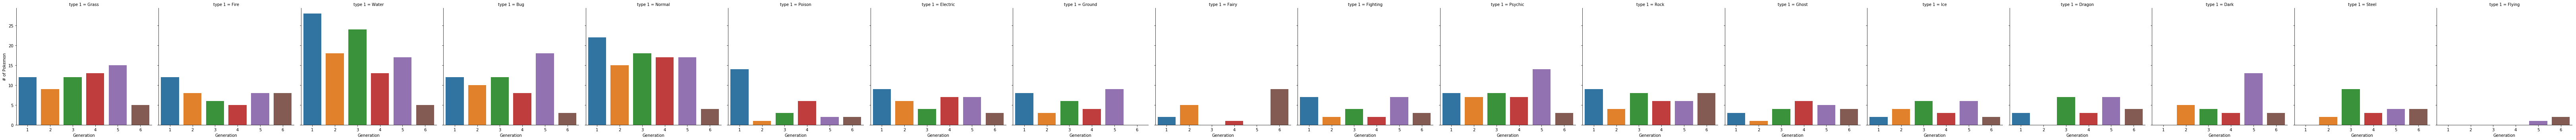

In [23]:
sb.factorplot(kind='count', 
              data=pokedex, 
              col='type 1',
              x='generation').set_axis_labels("Generation", "# of Pokemon")

C:\Users\orpit\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


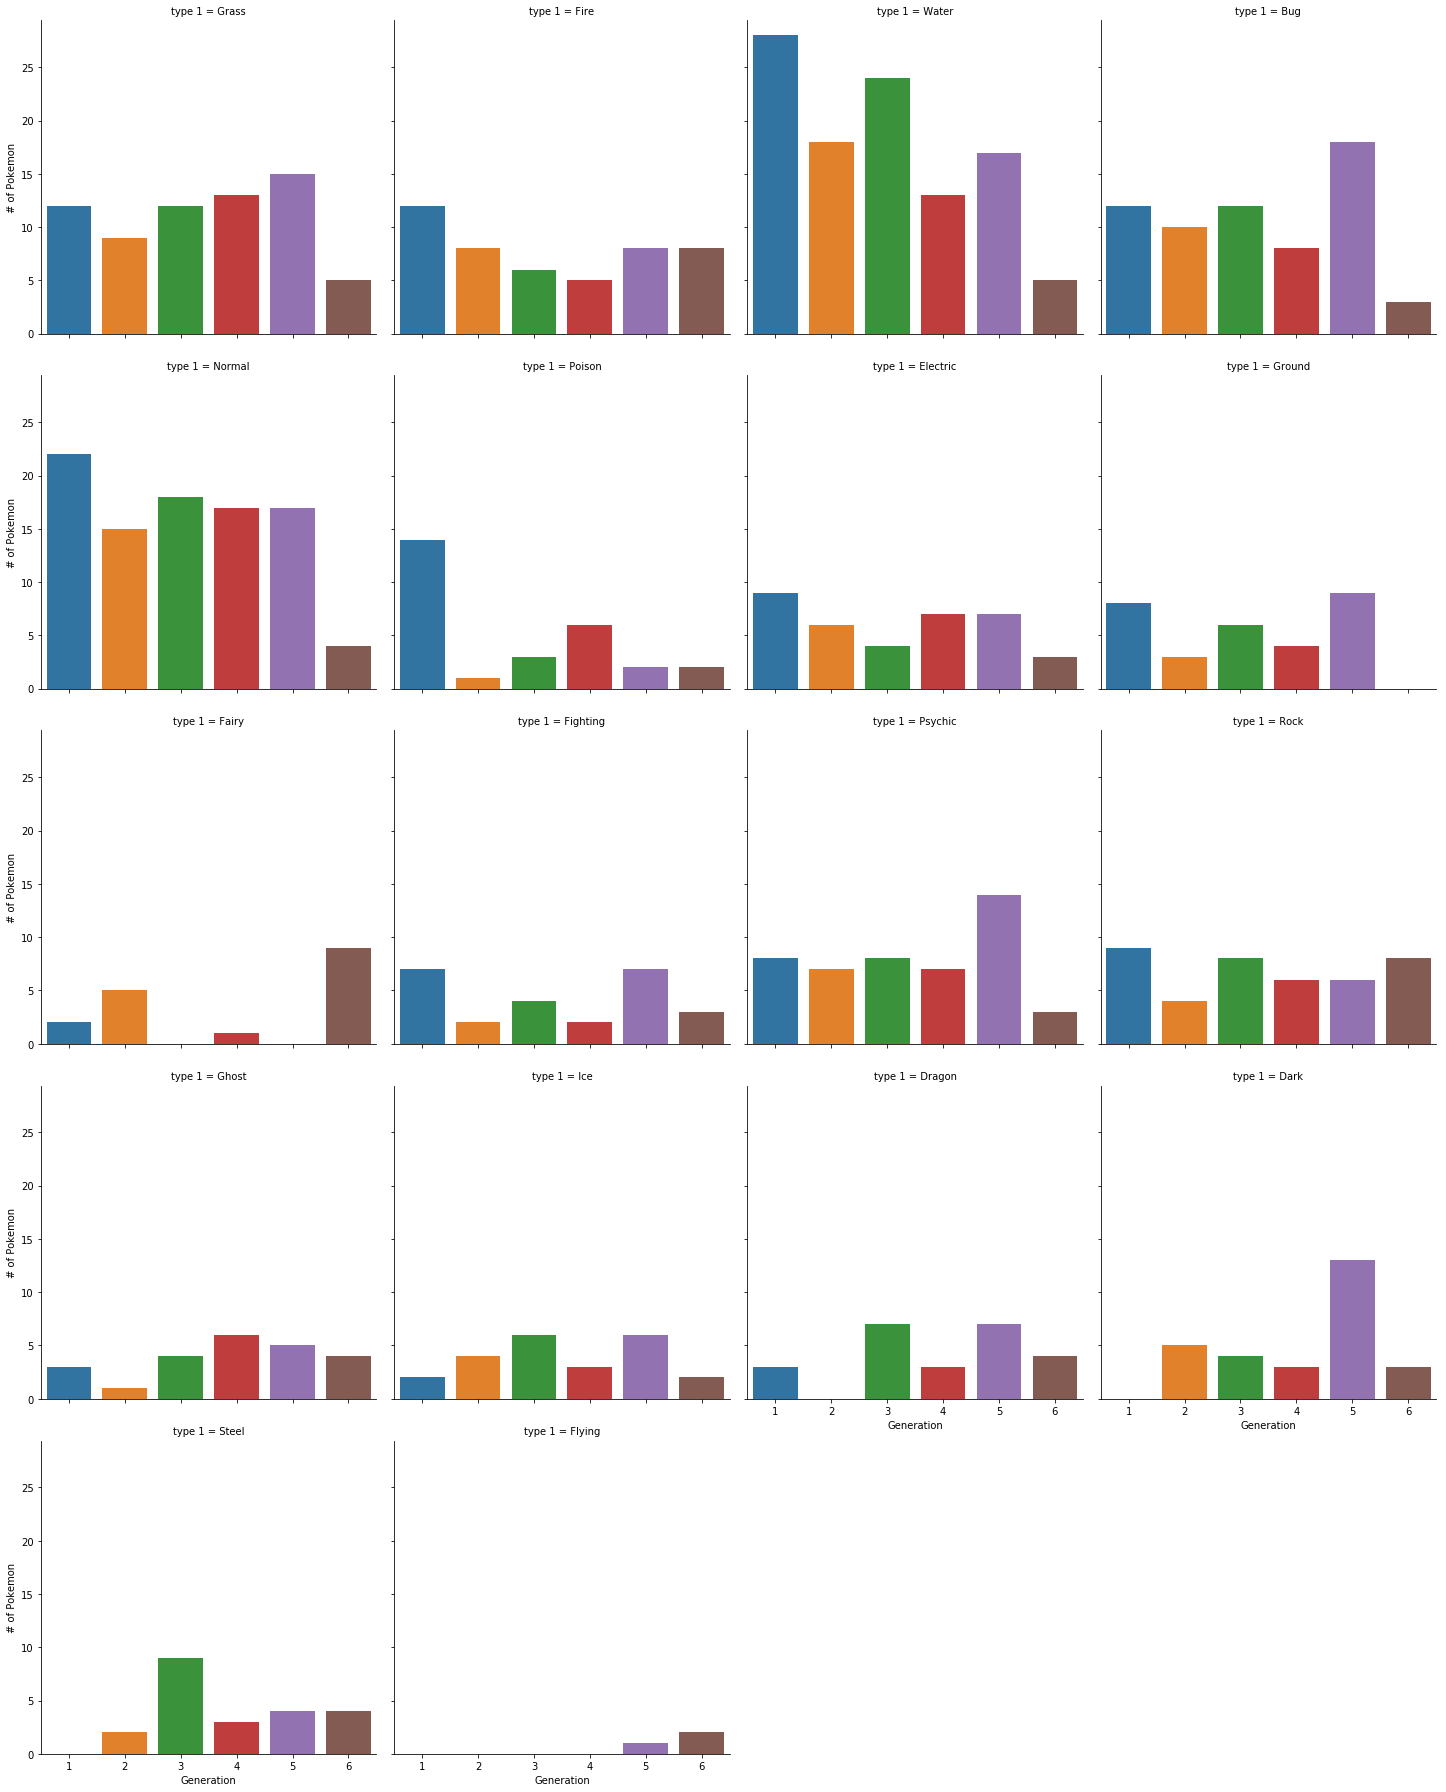

In [24]:
# Add col_wrap option to the above to get below (look into sb.factorplot documentation)
sb.factorplot(kind='count', 
              col_wrap=4,
              data=pokedex, 
              col='type 1',
              x='generation').set_axis_labels("Generation", "# of Pokemon")

In [25]:
#Summarize your observations/conclusions here :

#Water 'primary type' pokemon are most common in the game.
#Grass, Fire, Bug and Normal are the next most common pokemon across all generations of pokemon releases. 
#The largest number of pokemon were released in Generation 1 and the least were introduced in Generation 6, 
#with a general downward trend in numbers across the generations. 
#No Dark, Steel or Flying pokemon were released in Generation 1. 
#Pokemon with primary type Flying were infact released only in generation 5. 
#The developers appear to have made an attempt to balance frequency of each type in the game, though more calculations 
#will be required to confirm this result. 

#A consideration of 'secondary types' will also provide a more complete understanding of this data. 

### Are there unique primary or secondary Pokemon types, or if they simply share the same ones.

In [26]:
import numpy as np
unique_type1 = np.setdiff1d(pokedex['type 1'], pokedex['type 2'])
unique_type1

array([], dtype=object)

In [27]:
unique_type2 =  np.setdiff1d(pokedex['type 2'], pokedex['type 1'])
unique_type2

array(['blank'], dtype=object)

In [28]:
### There are no unique primary or secondary types

In [29]:
# Get The total number of primary and secondary types:

print('# of Type1 Pokemon: ',pokedex['type 1'].nunique())
print('# of Type2 Pokemon: ',pokedex['type 2'].nunique(), '("blank" is counted as 19th type)') 

# of Type1 Pokemon:  18
# of Type2 Pokemon:  19 ("blank" is counted as 19th type)


### What are the most common types of Pokemon?

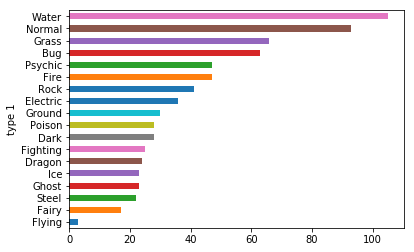

In [30]:
# Make a plot of the distribution of the Type 1 Pokemon. Sort the DB so that we see it in an ascending order !
pokedex.groupby('type 1')['type 1'].count().sort_values().plot(kind='barh')

C:\Users\orpit\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\orpit\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


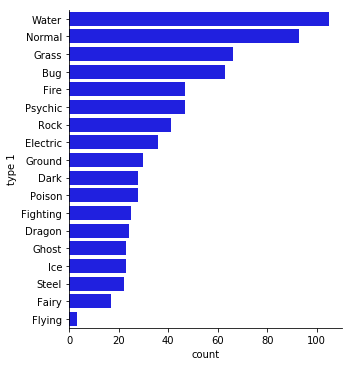

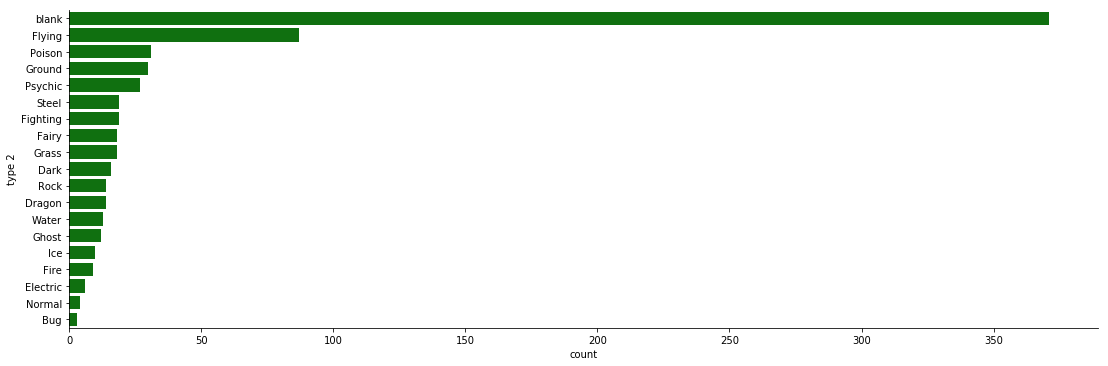

In [31]:
# Now try Seaborn:
sb.factorplot(data=pokedex,
               y='type 1',
                kind='count',
                 order = pokedex['type 1'].value_counts().index,
                 color='blue',
                     aspect=1)

sb.factorplot(data=pokedex,
               y='type 2',
                kind='count',
                 order = pokedex['type 2'].value_counts().index,
                 color='green',
                     aspect=3.1)

In [32]:
#Summarize your observations/conclusions here :

#A large number of Pokemon species have a single 'type 1' primary type associated with it. 
#We have reconfirmed that 'Water' type is the most common primary type. 
#Bug and Normal are very common primary types, but uncommon secondary types. 
#On the other hand, Flying is a very common secondary type but not as common primary type. 

### But we can not say which type maps into which type !

Lets create a heatmap !

In [33]:
# Create a new df called "dual_types" by getting rid of the records for which we do not have Type 2
dual_types=pokedex[pokedex['type 2']!='blank']
dual_types

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
6,6,Charizard,Fire,Flying,1,False
15,12,Butterfree,Bug,Flying,1,False
16,13,Weedle,Bug,Poison,1,False
17,14,Kakuna,Bug,Poison,1,False
18,15,Beedrill,Bug,Poison,1,False
20,16,Pidgey,Normal,Flying,1,False
21,17,Pidgeotto,Normal,Flying,1,False


In [34]:
# Get a grid of values from 'type 1' 'type 2'  (Hint: use groupby, size, unstack, values 
#and any other attributes you may need !)
grid=dual_types.groupby(['type 1','type 2']).count().unstack()['id']
grid.shape

(18, 18)

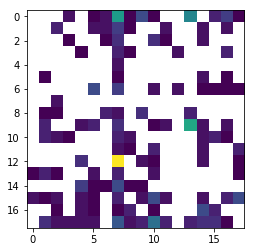

In [35]:
# Try matplotlib imshow as a way to get a heatmap, something like this:
import matplotlib.pyplot as plt
plt.imshow(grid)

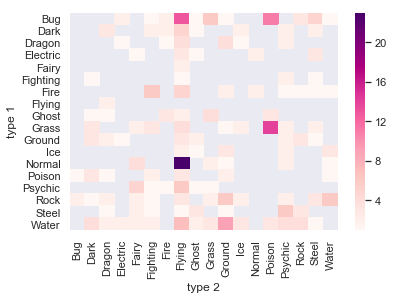

In [36]:
# Obviousely, the plot is not very nice !
sb.set(style='darkgrid')
sb.heatmap(grid, cmap='RdPu')
# Use seaborn heatmap option to get something like this :

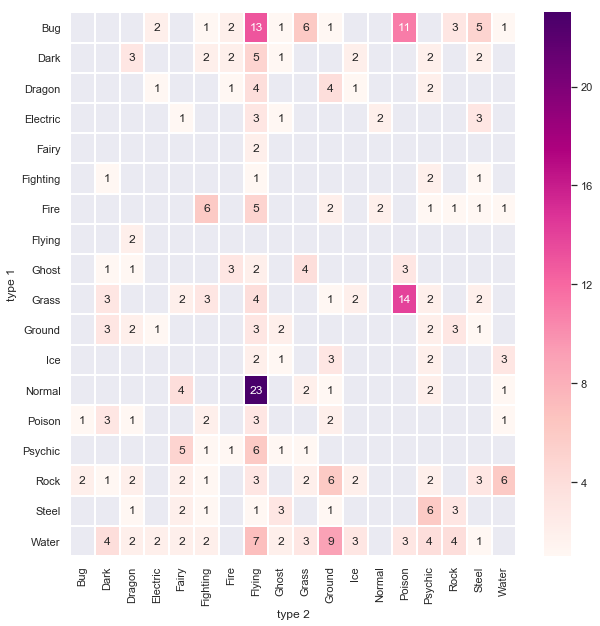

In [37]:
# Refine your seaborn expression to get a better heatmap :
sb.set(style='darkgrid')
plt.figure(figsize=(10, 10))
sb.heatmap(grid, annot=True, fmt='g',cmap='RdPu', linewidths=1)

In [38]:
print(pokedex[pokedex['type 2']=='blank'].count()['id'], 'pokemon have a single type. ')
print(sum(np.isnan(grid.values.reshape((324,1)))), 'are nan_combinations. ')

371 pokemon have a single type. 
[199] are nan_combinations. 


In [39]:
#Summarize your observations/conclusions here :
print('''
371 out of 721 pokemon or ~51.5% have a single type only.  
Normal/Flying is the most common dual type, with 23 Pokemon exhibiting this combination.
Grass/Poison, Bug/Flying and Bug/Poison are the next most common type combinations. 
199 of the possible conmbinantions are 'NaN'. So only ~38.6% of the possible combinations of types 
are present in this dataset. 
''')


371 out of 721 pokemon or ~51.5% have a single type only.  
Normal/Flying is the most common dual type, with 23 Pokemon exhibiting this combination.
Grass/Poison, Bug/Flying and Bug/Poison are the next most common type combinations. 
199 of the possible conmbinantions are 'NaN'. So only ~38.6% of the possible combinations of types 
are present in this dataset. 



### Are any of the statistics correlated?

Text(0, 0.5, 'Attack')

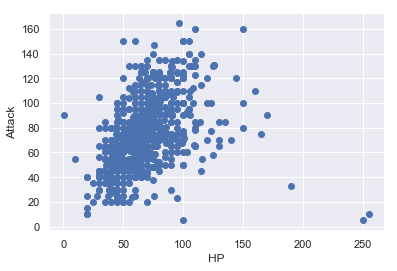

In [40]:
# It is a very natural question to ask.
# plot differernt combinations of quantities and see if you can see any correlation. Something like this:
plt.scatter(poke_statistics['hp'], poke_statistics['attack'])
plt.xlabel('HP')
plt.ylabel('Attack')

In [41]:
# It seems hard to see the correlation based on the scatter plots.
# Instead, use "pearsonr" function from scipy's "stats" library to compute the correlation between 
from scipy import stats
a,b=stats.pearsonr(poke_statistics['hp'], poke_statistics['attack'])
print('Pearson correlation coefficient of "HP" vs "Attack" is %3.4f with a p-value of %3.4e.'%(a,b))

Pearson correlation coefficient of "HP" vs "Attack" is 0.4258 with a p-value of 4.0036e-33.


In [42]:
# Loop over all combinations and output the correlation coefficients. Then sort based on the coefficients
coeffs=[]
combination=[]
for col_x in poke_statistics.columns:
    for col_y in poke_statistics.columns:
        combination.append([col_y,col_x])
        if (col_x!=col_y) and ([col_x,col_y] not in combination):
            a,b=stats.pearsonr(poke_statistics[col_x], poke_statistics[col_y])
            print('%3.4f with a p-value of %3.2f - Pearson correlation coefficient of %s vs %s.'%(a,b,col_x,col_y))
            coeffs.append([a,b,col_x,col_y])
coeffs_df=pd.DataFrame(coeffs, columns=['coefficient', 'p value', 'x', 'y'])
coeffs_df_sort=coeffs_df[coeffs_df['p value']<0.05].sort_values(by=['coefficient'],ascending=False)

print('\n\nSorted coefficients (where p values > 0.05 )')
coeffs_df_sort

0.1075 with a p-value of 0.00 - Pearson correlation coefficient of id vs hp.
0.1445 with a p-value of 0.00 - Pearson correlation coefficient of id vs attack.
0.1151 with a p-value of 0.00 - Pearson correlation coefficient of id vs defense.
0.1265 with a p-value of 0.00 - Pearson correlation coefficient of id vs sp. atk.
0.1050 with a p-value of 0.00 - Pearson correlation coefficient of id vs sp. def.
0.0282 with a p-value of 0.45 - Pearson correlation coefficient of id vs speed.
0.1604 with a p-value of 0.00 - Pearson correlation coefficient of id vs total.
0.4258 with a p-value of 0.00 - Pearson correlation coefficient of hp vs attack.
0.2342 with a p-value of 0.00 - Pearson correlation coefficient of hp vs defense.
0.3626 with a p-value of 0.00 - Pearson correlation coefficient of hp vs sp. atk.
0.3826 with a p-value of 0.00 - Pearson correlation coefficient of hp vs sp. def.
0.1700 with a p-value of 0.00 - Pearson correlation coefficient of hp vs speed.
0.6426 with a p-value of 0.00

,coefficient,p value,x,y
24,0.723143,1.153588e-117,sp. atk,total
26,0.707223,2.246205e-110,sp. def,total
17,0.704247,4.571780e-109,attack,total
12,0.642628,3.146173e-85,hp,total
21,0.605786,1.996910e-73,defense,total
27,0.548890,5.747028e-58,speed,total
22,0.493038,1.976293e-45,sp. atk,sp. def
19,0.479991,8.021536e-43,defense,sp. def
23,0.439548,2.040750e-35,sp. atk,speed
13,0.434022,1.764566e-34,attack,defense


C:\Users\orpit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


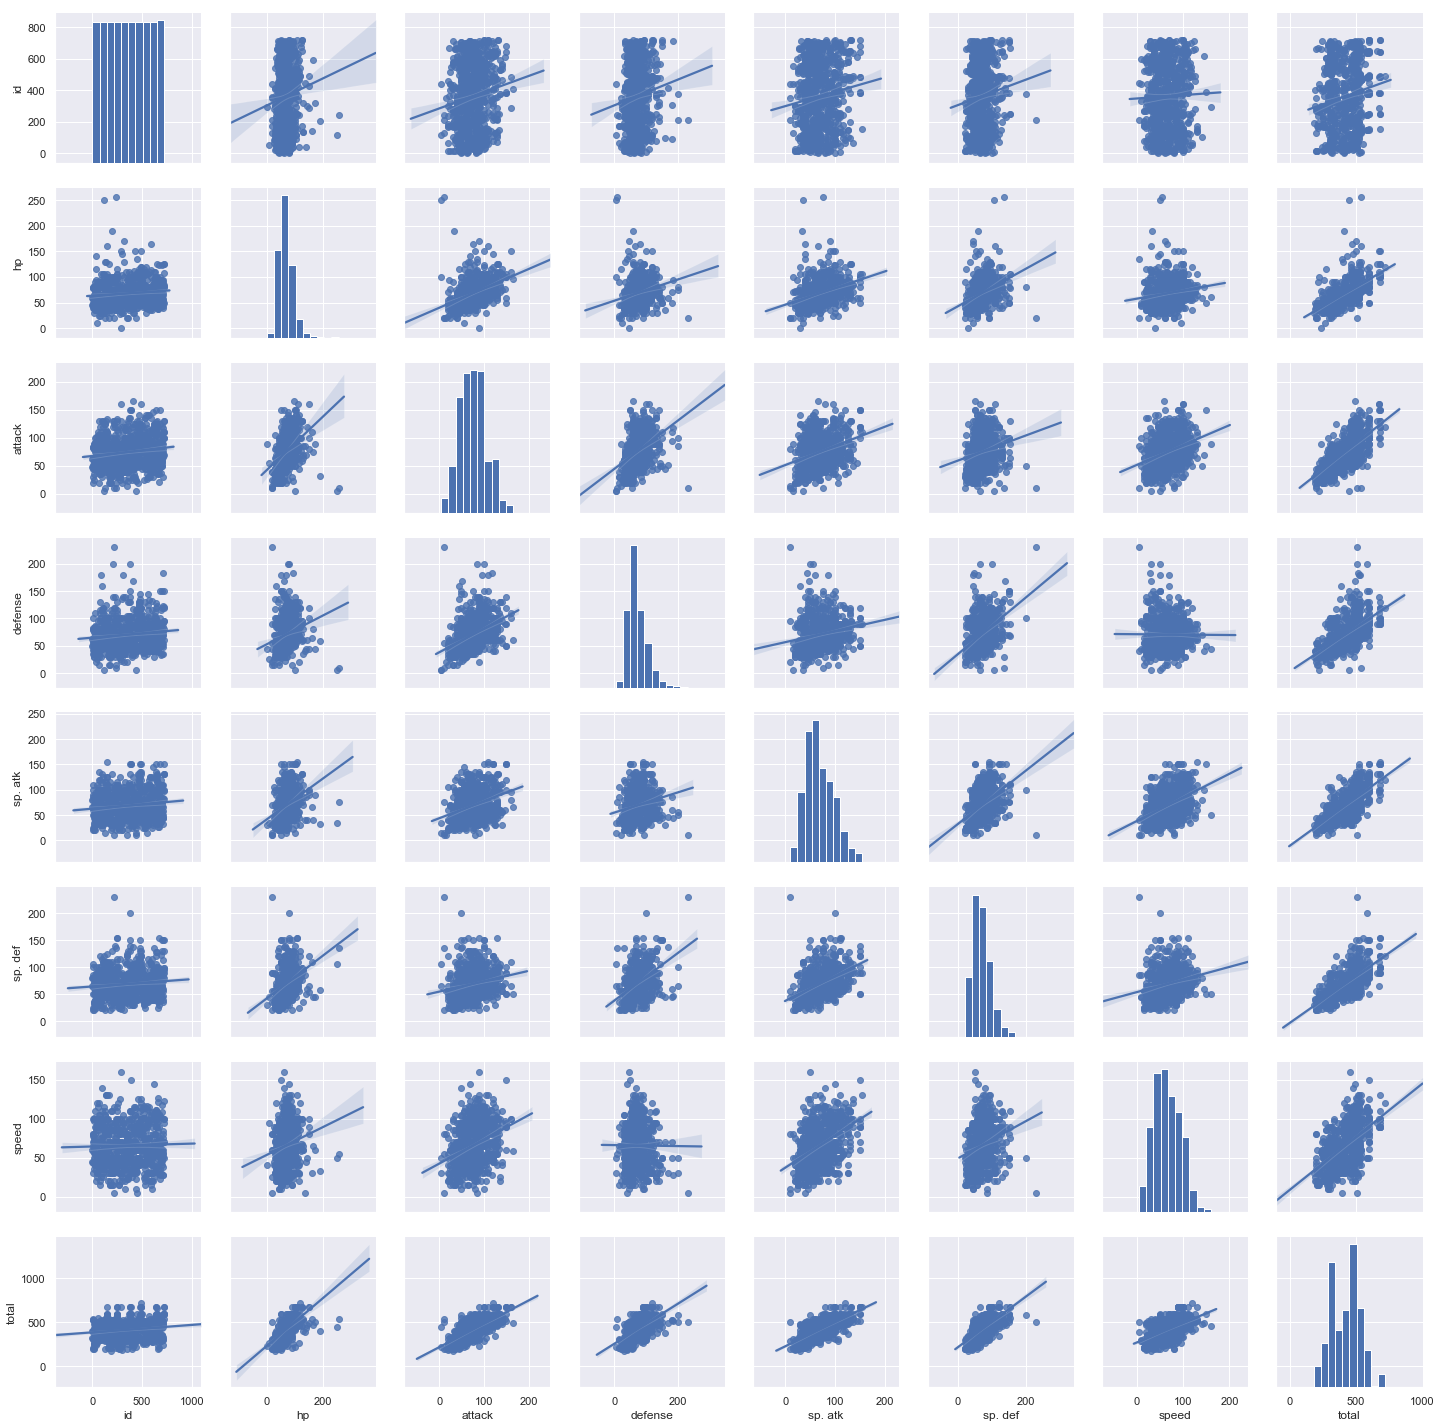

In [43]:
# Nothing is better than a good visualization. 
# Try seaborn's pairplot to get something like this :
sb.pairplot(poke_statistics, kind='reg')

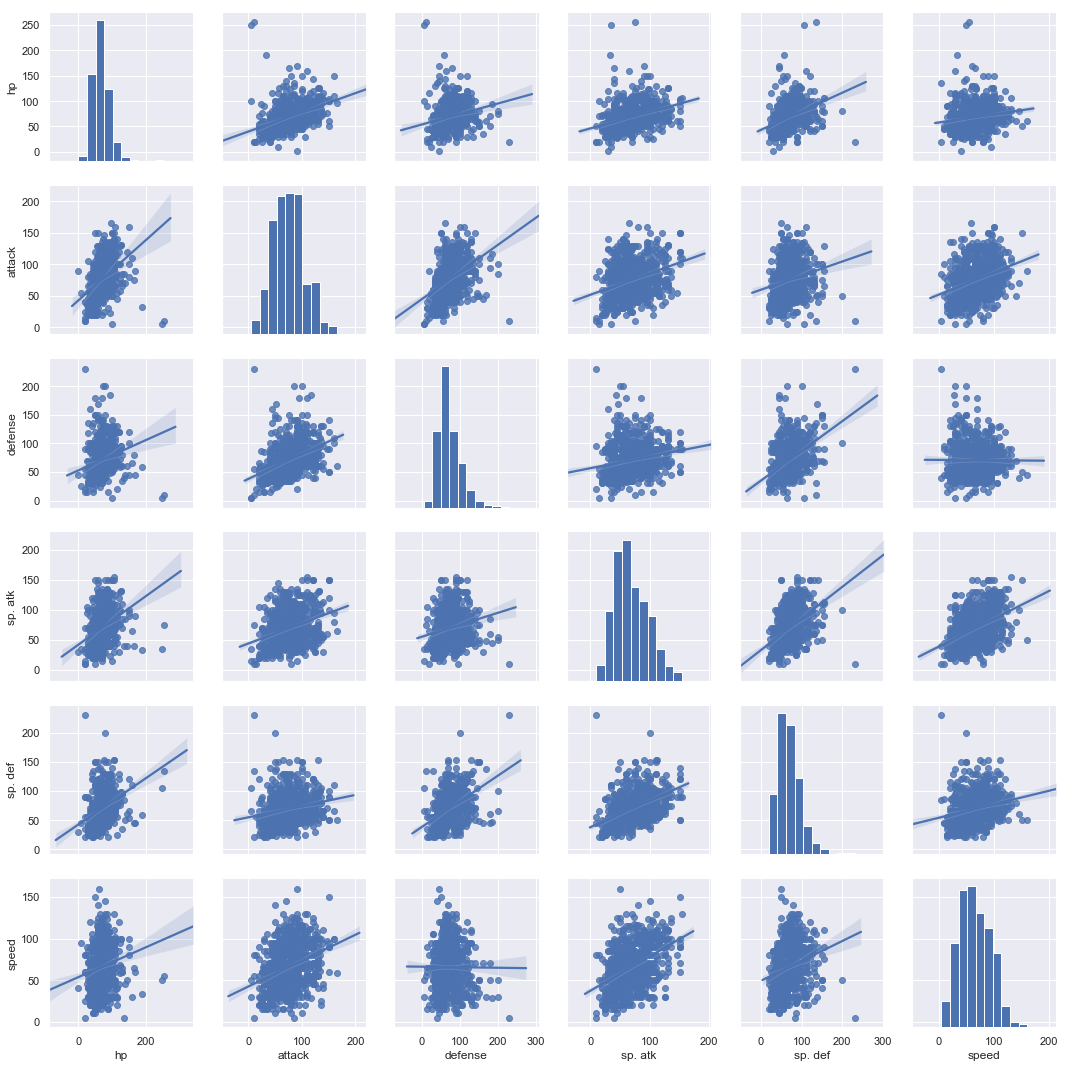

In [44]:
# Get rid of extra columns :
sb.pairplot(poke_statistics, kind='reg', vars=['hp','attack','defense','sp. atk','sp. def','speed'])

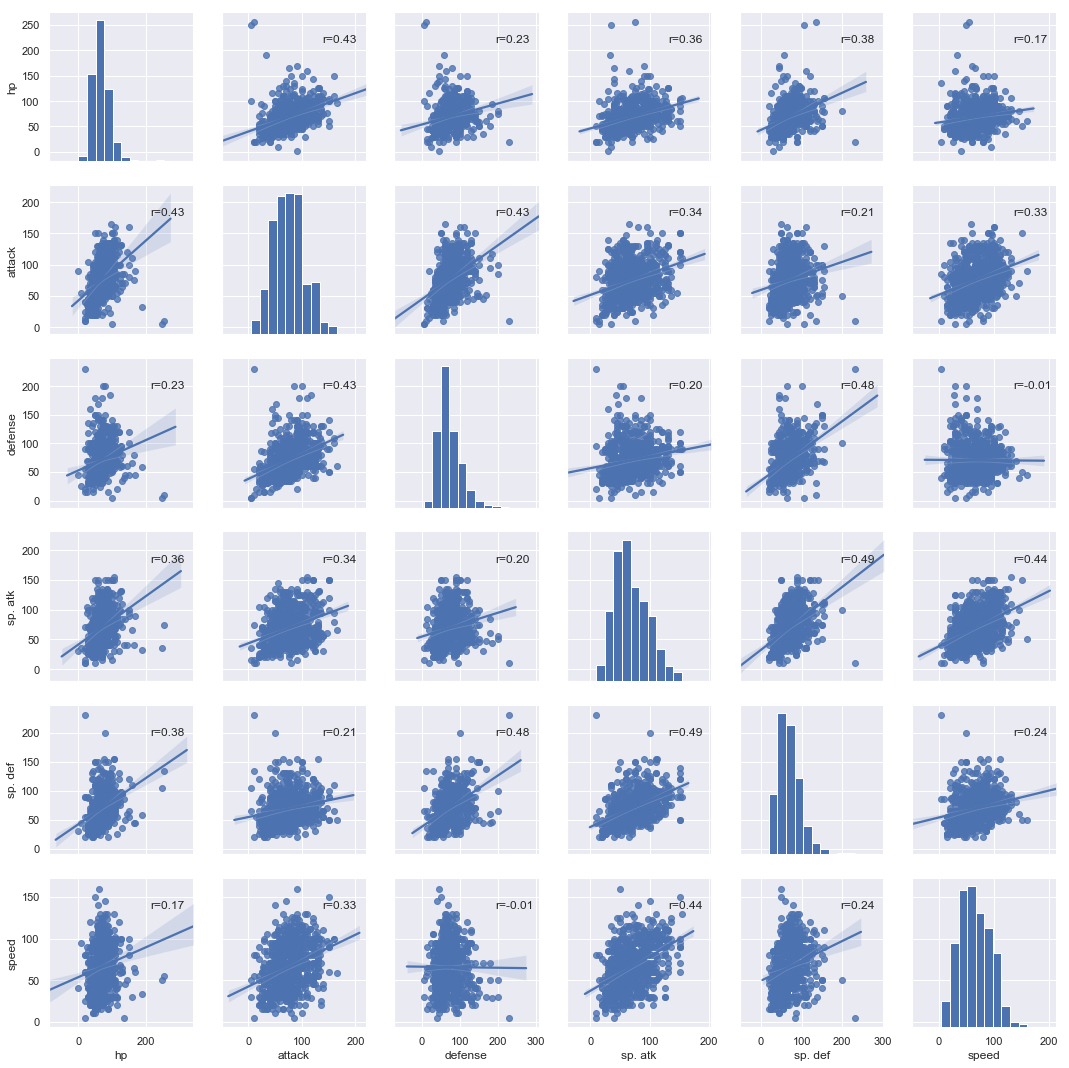

In [45]:
# See if you can refine your code to get this :
def corrfunc(x,y, ax=None, **kws):
    a,b=stats.pearsonr(x, y)
    plt.annotate('r=%3.2f'%a, xy=(.7,.8), xytext=(.7,.8), xycoords='axes fraction')
    
g=sb.pairplot(poke_statistics, kind='reg', vars=['hp','attack','defense','sp. atk','sp. def','speed'])
g.map_lower(corrfunc)
g.map_upper(corrfunc)

In [46]:
#Summarize your observations/conclusions here :
print('{} of the {} pairwaise comparisons are correlated (at p>0.05)'.format(len(coeffs_df_sort),len(coeffs)))
print('{} of the 26 pairwaise comparisons are strongly positively correlated (coefficient>0.5)'.format(len(coeffs_df_sort[coeffs_df_sort['coefficient']>0.5])))

26 of the 28 pairwaise comparisons are correlated (at p>0.05)
6 of the 26 pairwaise comparisons are strongly positively correlated (coefficient>0.5)


In [47]:
coeffs_df_sort[coeffs_df_sort['coefficient']>0.5]

,coefficient,p value,x,y
24,0.723143,1.153588e-117,sp. atk,total
26,0.707223,2.246205e-110,sp. def,total
17,0.704247,4.571780e-109,attack,total
12,0.642628,3.146173e-85,hp,total
21,0.605786,1.996910e-73,defense,total
27,0.548890,5.747028e-58,speed,total


In [48]:
coeffs_df_sort[(coeffs_df_sort['coefficient']<0.5) & (coeffs_df_sort['coefficient']>0.3)]

,coefficient,p value,x,y
22,0.493038,1.976293e-45,sp. atk,sp. def
19,0.479991,8.021536e-43,defense,sp. def
23,0.439548,2.040750e-35,sp. atk,speed
13,0.434022,1.764566e-34,attack,defense
7,0.425839,4.003641e-33,hp,attack
10,0.382569,1.516209e-26,hp,sp. def
9,0.362636,7.888100e-24,hp,sp. atk
14,0.339699,6.224691e-21,attack,sp. atk
16,0.332172,4.939662e-20,attack,speed


In [49]:
print('''All six statistics are strongly correlated to the "total" which is expected.
There is some correlation between attack and defense.
There is some correlation between attack and hp.
Sp.atk too has some correlations  with speed, hp, attack and sp. def
''')

All six statistics are strongly correlated to the "total" which is expected.
There is some correlation between attack and defense.
There is some correlation between attack and hp.
Sp.atk too has some correlations  with speed, hp, attack and sp. def



### What are the strongest and weakest Pokemon species?

In [50]:
# Do your calculations here :
df_for_scale=poke_statistics[['hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed']]

from sklearn.preprocessing import StandardScaler 
  
# Initialise the Scaler 
scaler = StandardScaler()

# Scale data
poke_scaled=scaler.fit_transform(df_for_scale)

C:\Users\orpit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\orpit\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
# Explain why useing "Total" is not the best meric ?
print('''We do not want to sum unlike quantities. 
For ex. if one of the factors has a much larger range of magnitudes, it will overpower the aggregated statistic.''' )

We do not want to sum unlike quantities. 
For ex. if one of the factors has a much larger range of magnitudes, it will overpower the aggregated statistic.


In [52]:
# Instead, try a different metric: standardize the six statistic columns independently by converting each 
# value into a z-score so when we do take the sum, we account for the variation in the each statistic using 
# its mean and standard deviation across all Pokemon species. 

In [53]:
# Define a new column, strength, as the sum of the z-scores of each statistic—the higher this value, 
# the stronger the Pokemon.
poke_scaled_df=pd.DataFrame(poke_scaled, columns=['hp','attack','defense','sp. atk','sp. def','speed'])
poke_scaled_df['strength']=poke_scaled_df.sum(axis=1)
poke_scaled_df.set_index(poke_statistics['id'], inplace=True)
poke_scaled_df.sort_values('strength', axis=0, inplace=True)

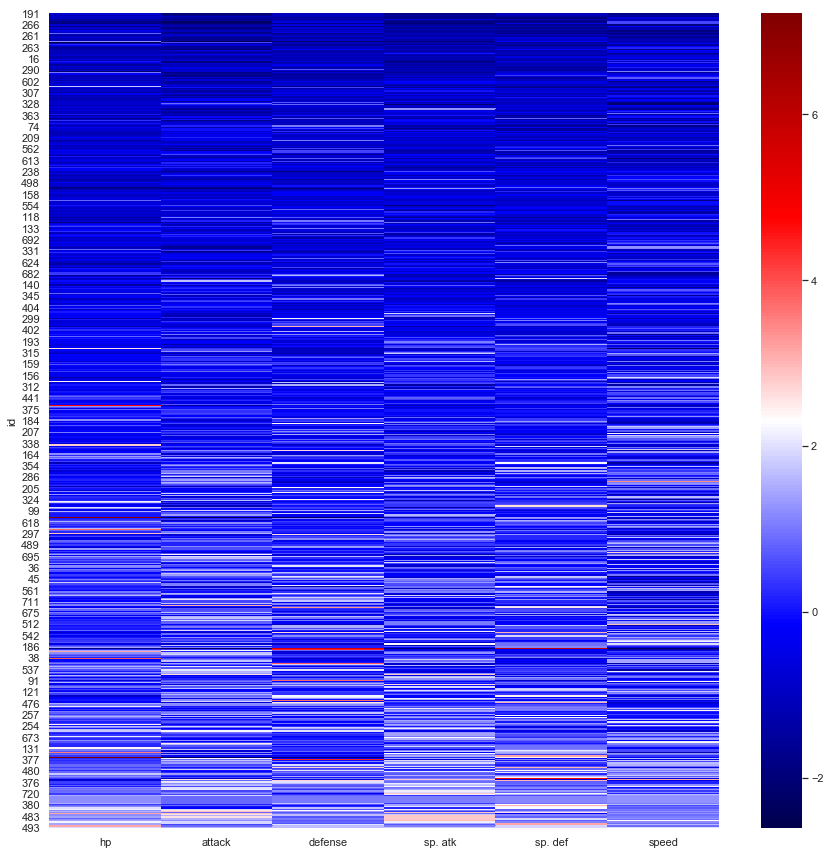

In [54]:
# Repeat the heatmap you created but now for the new strength metric you computed
import matplotlib.pyplot as plt
#sb.set(style='darkgrid', font_scale=0.8)
plt.figure(figsize=(15, 15))
sb.heatmap(poke_scaled_df.drop('strength', axis=1), cmap='seismic')

### Do any types of Pokemon excel at certain statistics over others?

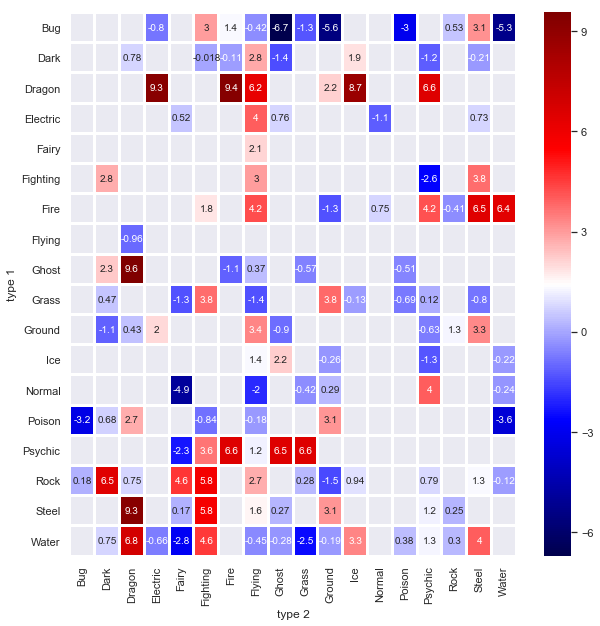

In [55]:
# Do your calculations here. Create a heat map to show this at the end.
df_new=pd.merge(dual_types,poke_scaled_df, how='left', left_on='id', right_on=poke_scaled_df.index)
sb.set(style='darkgrid')
plt.figure(figsize=(10, 10))
sb.heatmap(df_new.groupby(['type 1','type 2']).mean().unstack()['strength'], cmap='seismic', annot=True, annot_kws={"size": 10}, linewidths=2)

### Are any of the statistics correlated?

In [56]:
poke_scaled_df

,hp,attack,defense,sp. atk,sp. def,speed,strength
id,,,,,,,
191,-1.485851,-1.553341,-1.394964,-1.345249,-1.457563,-1.310183,-8.547151
298,-0.711567,-1.897573,-1.052201,-1.691527,-1.085548,-1.677035,-8.115452
401,-1.214852,-1.725457,-1.017925,-1.518388,-1.048347,-1.493609,-8.018578
265,-0.905138,-1.036993,-1.223583,-1.691527,-1.457563,-1.677035,-7.991838
13,-1.098709,-1.381225,-1.394964,-1.691527,-1.829577,-0.576481,-7.972482
10,-0.905138,-1.553341,-1.223583,-1.691527,-1.829577,-0.759906,-7.963072
280,-1.563279,-1.725457,-1.566346,-0.825832,-1.271555,-0.943332,-7.895801
664,-1.176137,-1.381225,-1.052201,-1.449132,-1.643570,-1.126758,-7.829023
129,-1.872992,-2.241805,-0.538057,-1.864665,-1.829577,0.524073,-7.823023


In [57]:
from scipy import stats
coeffs=[]
combination=[]
for col_x in poke_scaled_df.columns:
    for col_y in poke_scaled_df.columns:
        combination.append([col_y,col_x])
        if (col_x!=col_y) and ([col_x,col_y] not in combination):
            a,b=stats.pearsonr(poke_scaled_df[col_x], poke_scaled_df[col_y])
            coeffs.append([a,b,col_x,col_y])
coeffs_df=pd.DataFrame(coeffs, columns=['coefficient', 'p value', 'x', 'y'])
coeffs_df_sort=coeffs_df[coeffs_df['p value']<0.05].sort_values(by=['coefficient'],ascending=False)

print('\n\nSorted coefficients (where p values > 0.05 )')
coeffs_df_sort



Sorted coefficients (where p values > 0.05 )


,coefficient,p value,x,y
17,0.721377,7.865432e-117,sp. atk,strength
19,0.712048,1.566348e-112,sp. def,strength
10,0.696699,8.056911e-106,attack,strength
5,0.654796,1.711947e-89,hp,strength
14,0.595877,1.648611e-70,defense,strength
20,0.552111,9.174289e-59,speed,strength
15,0.493038,1.976293e-45,sp. atk,sp. def
12,0.479991,8.021536e-43,defense,sp. def
16,0.439548,2.040750e-35,sp. atk,speed
6,0.434022,1.764566e-34,attack,defense


C:\Users\orpit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


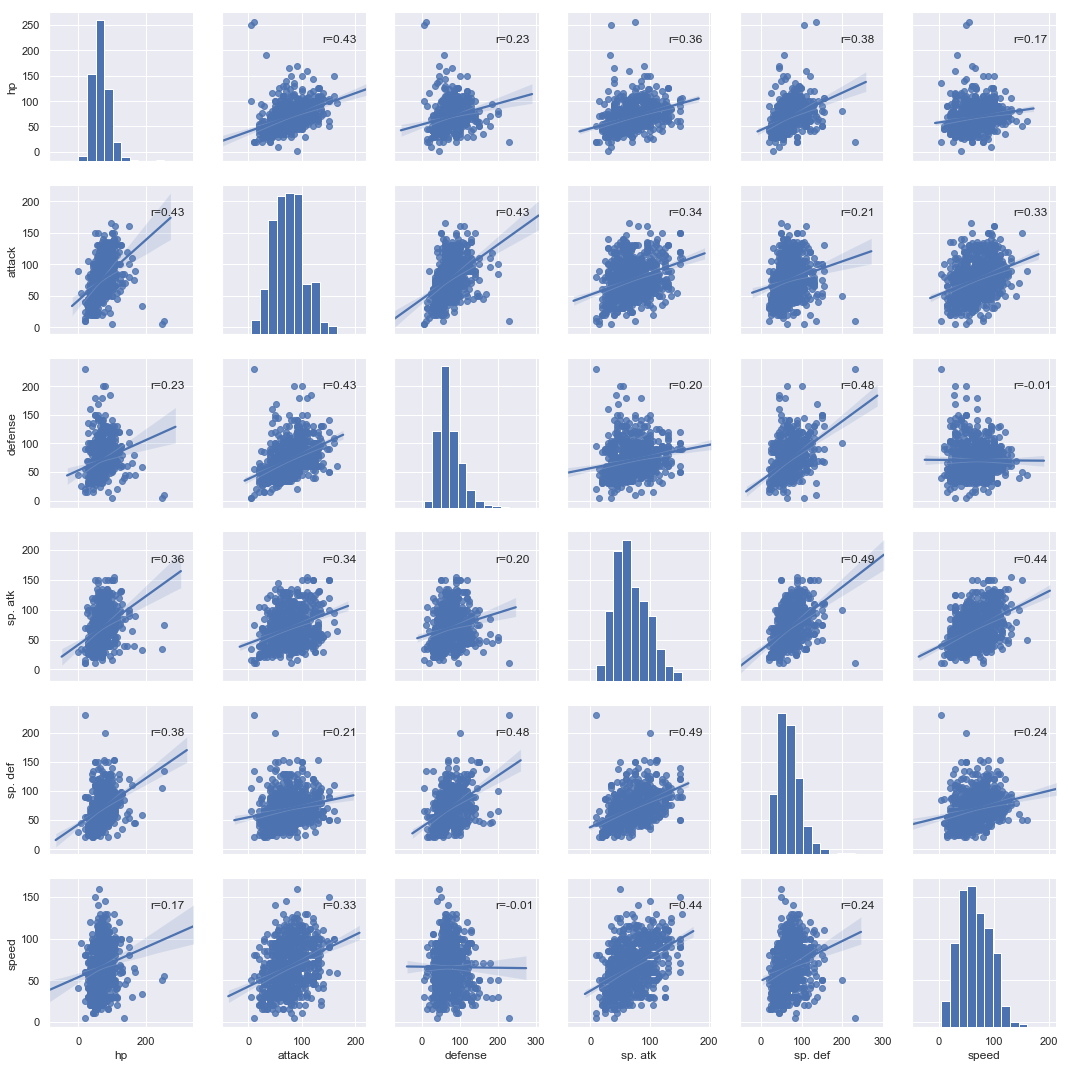

In [58]:
def corrfunc(x,y, ax=None, **kws):
    a,b=stats.pearsonr(x, y)
    plt.annotate('r=%3.2f'%a, xy=(.7,.8), xytext=(.7,.8), xycoords='axes fraction')
    
g=sb.pairplot(poke_statistics, kind='reg', vars=['hp','attack','defense','sp. atk','sp. def','speed'])
g.map_lower(corrfunc)
g.map_upper(corrfunc)

In [59]:
#Summarize your observations/conclusions here :
print('{} of the {} pairwaise comparisons are correlated (at p>0.05)'.format(len(coeffs_df_sort),len(coeffs)))
print('{} of the 20 pairwaise comparisons are strongly positively correlated (coefficient>0.5)'.format(len(coeffs_df_sort[coeffs_df_sort['coefficient']>0.5])))

20 of the 21 pairwaise comparisons are correlated (at p>0.05)
6 of the 20 pairwaise comparisons are strongly positively correlated (coefficient>0.5)


In [60]:
coeffs_df_sort[coeffs_df_sort['coefficient']>0.5]

,coefficient,p value,x,y
17,0.721377,7.865432e-117,sp. atk,strength
19,0.712048,1.566348e-112,sp. def,strength
10,0.696699,8.056911e-106,attack,strength
5,0.654796,1.711947e-89,hp,strength
14,0.595877,1.648611e-70,defense,strength
20,0.552111,9.174289e-59,speed,strength


In [61]:
coeffs_df_sort[(coeffs_df_sort['coefficient']<0.5) & (coeffs_df_sort['coefficient']>0.3)]

,coefficient,p value,x,y
15,0.493038,1.976293e-45,sp. atk,sp. def
12,0.479991,8.021536e-43,defense,sp. def
16,0.439548,2.040750e-35,sp. atk,speed
6,0.434022,1.764566e-34,attack,defense
0,0.425839,4.003641e-33,hp,attack
3,0.382569,1.516209e-26,hp,sp. def
2,0.362636,7.888100e-24,hp,sp. atk
7,0.339699,6.224691e-21,attack,sp. atk
9,0.332172,4.939662e-20,attack,speed


In [62]:
print('''All correlations are similar to when we had un-standardized data. 
This tells us that the scale of the statistic before standardization was comparable. 
''')

All correlations are similar to when we had un-standardized data. 
This tells us that the scale of the statistic before standardization was comparable. 

